# 컴퓨터 비전(Computer vision)
- 컴퓨터를 이용하여 이미지 또는 동영상으로 부터 의미 있는 정보를 추출하는 방법을 연구하는 학문



# 영상(image)이란?
- 픽셀(pixel)이 바둑판 모양의 격자에 나열되어 있는 형태
- 픽셀: 이미지의 기본 단위, 화소
    - 0 ~ 255 범위의 256개의 정수로 표현(uint8)


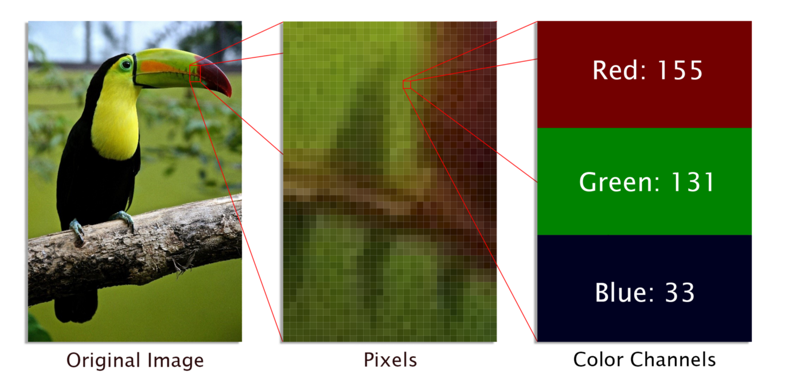

## Grayscale 이미지
- 색상 정보가 없어 오직 밝기 정보만으로 구성된 이미지
- 밝기 정보를 256 단계로 표현


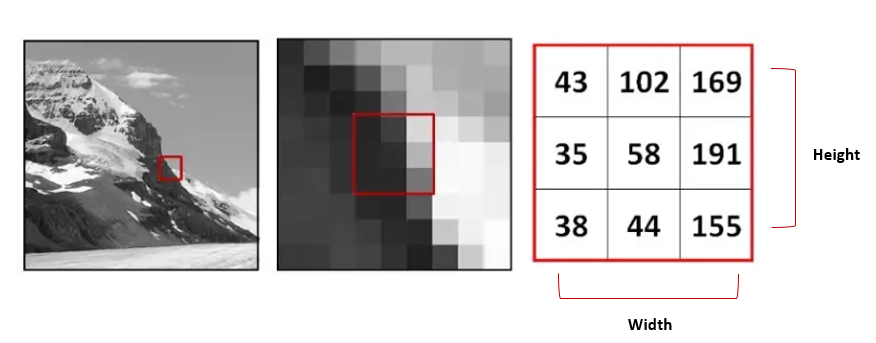

## Truecolor 이미지
- 색상 정보를 가지고 있어 다양한 색상을 표현 할수 있는 이미지
- Red, Green, Blue 각각의 색 성분을 256 단계로 표현
- $256^3$ = 16,777,216 색상 표현 가능


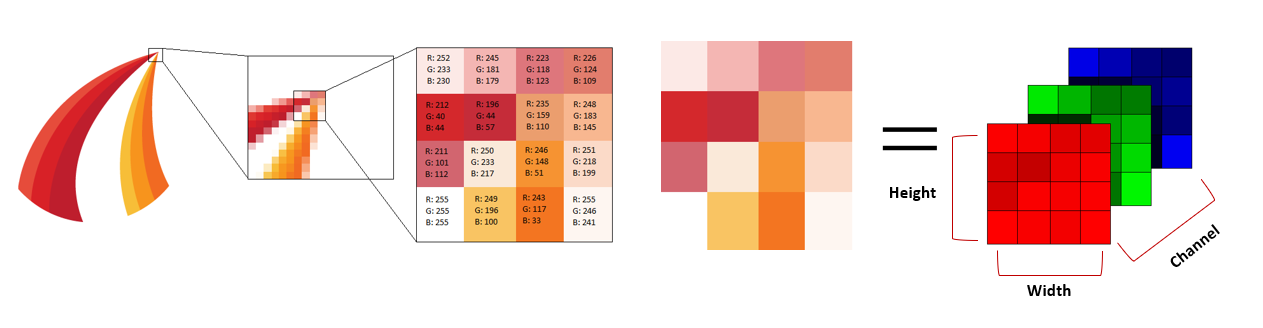

# Fully Connected Network 한계
- 3차원의 데이터인 이미지 데이터도 1차원의 데이터로 변형한 뒤 linear layer 에 입력하여 이미지 형상을 무시


# 합성곱 신경망 (Convolutional Neural Network)
- 필터(filter)를 이용하여 합성곱 연산
- 입력 데이터에 필터에 대응하는 원소끼리 곱하고, 그 합을 구한다.
    - 연산이 완료된 결과를 이미지에 부분적으로 특징을 뽑아내서 특징 맵(feature map)이라고도 부른다.
- 필터(filter)
    - 커널(kernel)이라고도 한다.



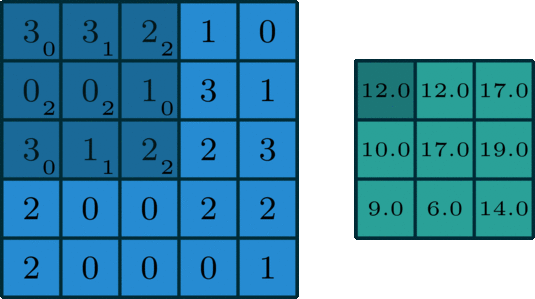

In [121]:
import numpy as np
from scipy.signal import convolve2d

# 입력 행렬과 커널 정의
input_matrix = np.array([
    [3, 3, 2, 1, 0],
    [0, 0, 1, 3, 1],
    [3, 1, 1, 2, 2],
    [2, 0, 0, 2, 2],
    [2, 0, 1, 0, 2]
])

kernel = np.ones((3, 3))

# 2D 컨볼루션 수행
output_matrix = convolve2d(input_matrix, kernel, mode='valid')

print(output_matrix)

#1
# 3 3 2
# 0 0 1
# 3 1 1
# 3*1 + 3*1 + 2*1 + 0*1 + 0*1 + 1*1 + 3*1 + 1*1 + 1*1 = 14

#2
# 3 2 1
# 0 1 3
# 1 1 2
# 3*1 + 2*1 + 1*1 + 0*1 + 1*1 + 3*1 + 1*1 + 1*1 + 2*1 = 14

#3
# 2 1 0
# 1 3 1
# 1 2 2
# 2*1 + 1*1 + 0*1 + 1*1 + 3*1 + 1*1 + 1*1 + 2*1 + 2*1 = 13


[[14. 14. 13.]
 [ 8. 10. 14.]
 [10.  7. 12.]]


## Padding
- 합성곱 연산을 수행하기 전에 입력데이터 주변을 특정값으로 채우는 것


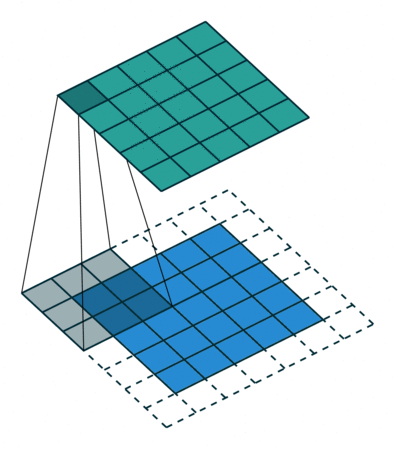

## Stride
- 필터를 적용하는 위치의 간격


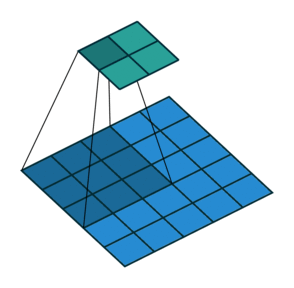

## Pooling
- 세로 및 가로 방향의 공간을 줄이는 연산
- 풀링은 일반적으로 같은 요소가 풀링연산에 재사용되지 않도록 필터 사이즈와 스트라이드 사이즈를 동일하게 한다.
- 가중치가 없고, 채널수가 변경되지 않음.


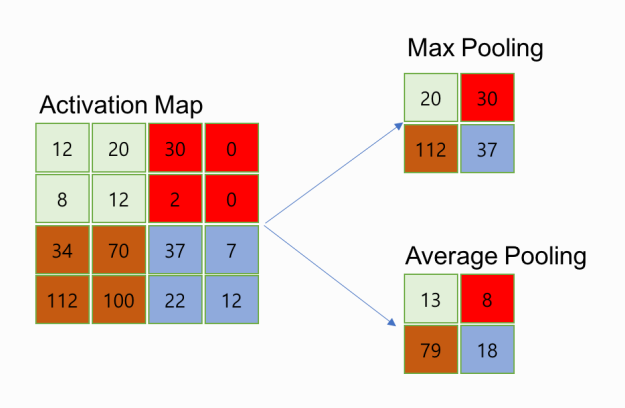

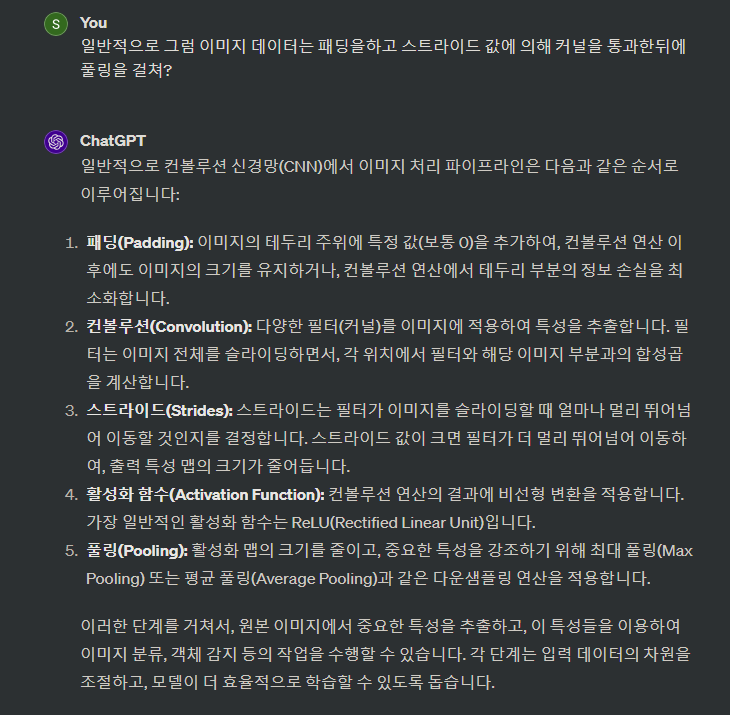

In [122]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

# 재현성 함수
def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = os.getcwd()
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device,DATA_PATH

('cuda', 'c:\\study\\03_Deep_Learning')

In [123]:
#import shutil
#import os

# 복사할 파일의 경로
#source_path = DATA_PATH+"/data/cats_and_dogs.zip"

# 복사될 파일의 경로
#destination_path = DATA_PATH+"/copy_cats_and_dogs.zip"

# 원본 파일과 대상 파일이 동일한지 확인
#if os.path.abspath(source_path) != os.path.abspath(destination_path):
    # 파일 복사
#    shutil.copy(source_path, destination_path)
#    print(f"파일이 성공적으로 복사되었습니다: {destination_path}")
#else:
#    print("원본 파일과 대상 파일이 동일합니다. 다른 경로를 지정해 주세요.")

In [124]:
import zipfile
import os

# 압축 파일 경로
zip_path = DATA_PATH+"/data/cats_and_dogs.zip"

# 압축 해제될 디렉토리
extract_to = DATA_PATH+"/data/cats_and_dogs"

# 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

- glob 라이브러리
    - 디렉토리에 경로가 포함된 파일명을 리스트로 담을 때 사용

In [125]:
from glob import glob
import os

# 데이터 경로 설정
DATA_PATH = "C:/study/03_Deep_Learning"  # DATA_PATH를 실제 데이터 경로로 설정

# 고양이 이미지 파일 경로 설정
cats_path = os.path.join(DATA_PATH, "data/cats_and_dogs/train/cats/*.jpg")
cats_list = sorted(glob(cats_path))

# 개 이미지 파일 경로 설정
dogs_path = os.path.join(DATA_PATH, "data/cats_and_dogs/train/dogs/*.jpg")
dogs_list = sorted(glob(dogs_path))

# 결과 출력
print("Cats list:", cats_list)
print("Dogs list:", dogs_list)


Cats list: ['C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.0.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.1.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.10.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.100.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.101.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.102.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.103.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.104.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.105.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.106.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.107.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.108.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.109.jpg', 'C:/study/03_Deep_Learning\\data/cats_and_do

- 고양이는 0,  개는 1

In [126]:
labels = [0] * len(cats_list) + [1] * len(dogs_list)
img_path = cats_list + dogs_list

len(labels), len(img_path),img_path[:10],img_path[-10:]

(2000,
 2000,
 ['C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.0.jpg',
  'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.1.jpg',
  'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.10.jpg',
  'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.100.jpg',
  'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.101.jpg',
  'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.102.jpg',
  'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.103.jpg',
  'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.104.jpg',
  'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.105.jpg',
  'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.106.jpg'],
 ['C:/study/03_Deep_Learning\\data/cats_and_dogs/train/dogs\\dog.990.jpg',
  'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/dogs\\dog.991.jpg',
  'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/dogs\\dog.992.jpg',
  'C:/study/03_

- 섞기

In [127]:
train = np.array(img_path)
target = np.array(labels)

np.random.seed(SEED)

index_arr = np.arange(train.shape[0])

print(index_arr[:5])
np.random.shuffle(index_arr)

print(index_arr[:5])
np.random.shuffle(index_arr)

print(index_arr[:5])

train = train[index_arr]
target = target[index_arr]

[0 1 2 3 4]
[1860  353 1333  905 1289]
[1891 1240  149 1000  520]


In [128]:
target[:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

# open cv
- 컴퓨터 비전 라이브러리 중 하나로  실시간 이미지 프로세싱에 중점을 둔 라이브러리
```shell
pip install opencv-python
```



In [129]:
!pip install opencv-python

In [130]:
import cv2

- 이미지 읽어 오기
    - ndarray 형태로 반환
    - 채널 순서가 BGR 형태로 로딩

In [131]:
train[0]

'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/dogs\\dog.900.jpg'

In [132]:
img_arr = cv2.imread(train[65]) # return: numpy.ndarray
img_arr.shape, type(img_arr), img_arr.dtype

((310, 500, 3), numpy.ndarray, dtype('uint8'))

In [133]:
img_arr.shape # height , width, channel

(310, 500, 3)

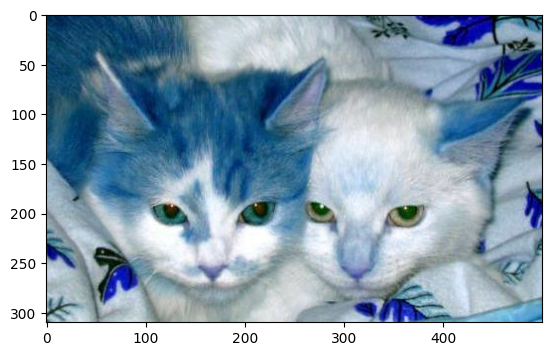

In [134]:
import matplotlib.pyplot as plt
plt.imshow(img_arr)
plt.show()

- rgb 형태로 변환하기

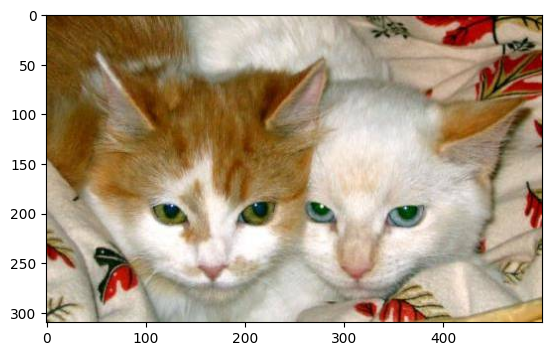

In [135]:
rgb_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_arr)
plt.show()

In [136]:
type(rgb_arr),rgb_arr.dtype

(numpy.ndarray, dtype('uint8'))

- resize

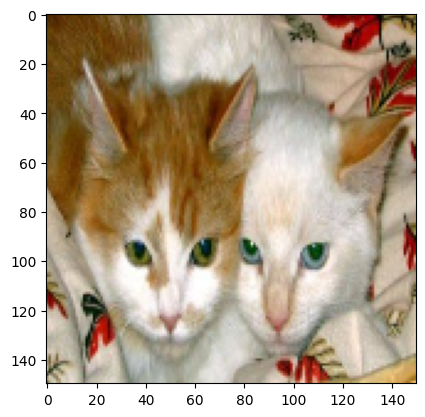

In [137]:
resize_arr = cv2.resize( rgb_arr, [150,150] )
plt.imshow(resize_arr)
plt.show()

- crop

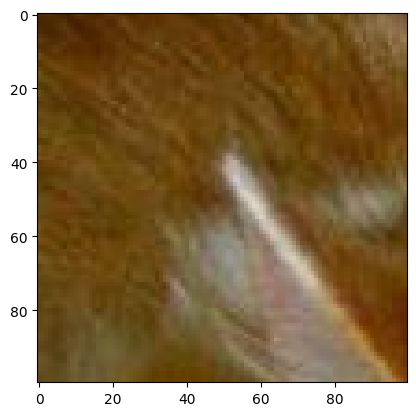

In [138]:
plt.imshow(rgb_arr[:100, :100])
plt.show()

- 중앙부분 crop

In [139]:
rgb_arr.shape[0] // 4

77

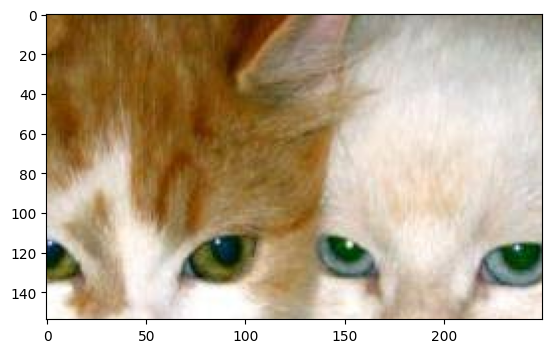

In [140]:
h_min = rgb_arr.shape[0] // 4
w_min = rgb_arr.shape[1] // 4

tmp = rgb_arr[h_min:h_min*3, w_min:w_min*3]
plt.imshow(tmp)
plt.show()

# pillow
- 이미지 분석및 처리를 쉽게 해주는 라이브러리

In [141]:
from PIL import Image

In [142]:
pil_image = Image.open(train[150])
type(pil_image) # rgb 형태로 로딩

PIL.JpegImagePlugin.JpegImageFile

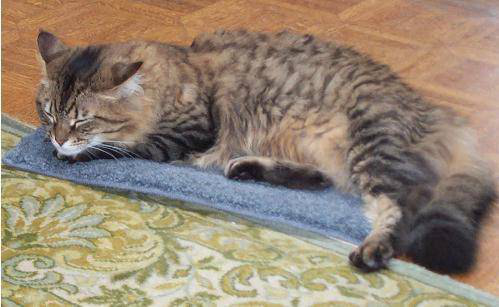

In [143]:
pil_image

- ndarray 변환

In [144]:
pil_image_arr = np.array(pil_image) # 이렇게 해야 넘파이 반환
type(pil_image_arr),pil_image_arr.shape

(numpy.ndarray, (307, 499, 3))

- ndarray to pil 객체

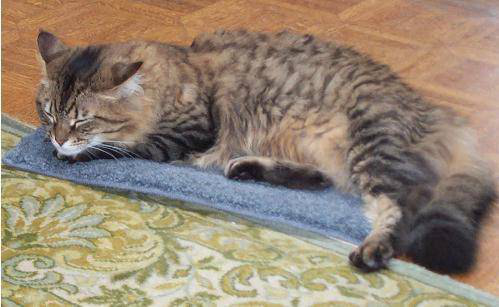

In [145]:
pil_image = Image.fromarray(pil_image_arr)
pil_image

- resize

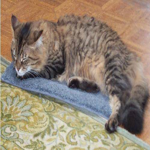

In [146]:
pil_image.resize([150,150])

- 정답 데이터 reshape

In [147]:
target = target.reshape(-1, 1)
target.shape

(2000, 1)

In [148]:
train

array(['C:/study/03_Deep_Learning\\data/cats_and_dogs/train/dogs\\dog.900.jpg',
       'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/dogs\\dog.314.jpg',
       'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.232.jpg',
       ...,
       'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/dogs\\dog.59.jpg',
       'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/cats\\cat.169.jpg',
       'C:/study/03_Deep_Learning\\data/cats_and_dogs/train/dogs\\dog.54.jpg'],
      dtype='<U67')

# Dataset 클래스 만들기

In [149]:
#cv사용
class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self,x ,y=None):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        item = {}
        x = cv2.imread(self.x[idx]) # 이미지 로딩 //넘파이 3차원 반환 ex)((310, 500, 3), numpy.ndarray, dtype('uint8'))
        x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB) # BGR TO RGB
        x = cv2.resize(x, [150,150]) # 입력 사이즈가 맞아야 하기 때문에 리사이징
        x = x / 255 # 각 픽셀의 값을 0-1 사이로 스케일링
        item["x"] =torch.Tensor(x)

        if self.y is not None:
            item["y"] = torch.Tensor( self.y[idx] )
        return item

In [233]:
class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self,x,y=None):
        self.x=x
        self.y=y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        x = cv2.resize(cv2.cvtColor(cv2.imread(self.x[idx]),cv2.COLOR_BGR2RGB),[150,150])
        x = x/255

        if self.y is not None:
            return {
                "x":torch.Tensor(x),
                "y":torch.Tensor(self.y[idx]) 
            }
        
        else:
            return {
                "x":torch.Tensor(x)
            }

In [220]:
# import torch
# from torch.utils.data import Dataset
# from torchvision import transforms
# from PIL import Image

# class CatDogDataset(Dataset):
#     def __init__(self, x, y=None, transform=None):
#         """
#         Args:
#             x (list of str): 이미지 파일 경로 리스트
#             y (list of int, optional): 레이블 리스트 (0 또는 1)
#             transform (callable, optional): 이미지 변환 함수
#         """
#         self.x = x
#         self.y = y
#         self.transform = transform

#     def __len__(self):
#         return len(self.x)

#     def __getitem__(self, idx):
#         # 이미지 로딩
#         img = Image.open(self.x[idx]).convert('RGB')

#         # 이미지 변환 적용
#         if self.transform:
#             img = self.transform(img)
#         else:
#             # 기본 변환 (리사이징 및 스케일링)
#             img = transforms.Resize((150, 150))(img)
#             img = transforms.ToTensor()(img)  # 이미지를 텐서로 변환하고 스케일링 수행

#         sample = {'x': img}

#         # 레이블이 주어진 경우
#         if self.y is not None:
#             sample['y'] = torch.Tensor(self.y[idx])

#         return sample


In [224]:
dt = CatDogDataset(train, target )
dl = torch.utils.data.DataLoader(dt, batch_size = 2, shuffle=False)
batch = next(iter(dl))
batch

{'x': tensor([[[[1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           ...,
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000]],
 
          [[1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           ...,
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000]],
 
          [[1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           ...,
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000]],
 
          ...,
 
          [[1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           ...,
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000]],
 
          [[1.

In [225]:
batch["x"].shape # batch, height, width , channel

torch.Size([2, 150, 150, 3])

In [226]:
batch["y"]

tensor([[1.],
        [1.]])

# torch.nn.Conv2d
- in_channels: input의 feature dimension(첫번째 인수)
- out_channels: output의 feature dimension(두번째 인수)
- kernel_size: 필터 크기(세번째 인수)
- stride: kernel을 얼마만큼씩 이동하면서 적용할 것인가 (Default: 1)
- padding: 얼마만큼 padding할 것인가 (Default: 0)
- 입력 텐서 shape
    - Batch,channel, height, width

In [161]:
x = batch["x"]
x=x.permute(0,3,2,1)
x.shape # b, c, h , w 

torch.Size([2, 3, 150, 150])

In [163]:
conv2d = torch.nn.Conv2d(3, 16, 3) # 입력 데이터 채널수, 출력 채널수, 필터 사이즈
x = conv2d(x)
x.shape # Batch,channel, height, width

torch.Size([2, 16, 148, 148])

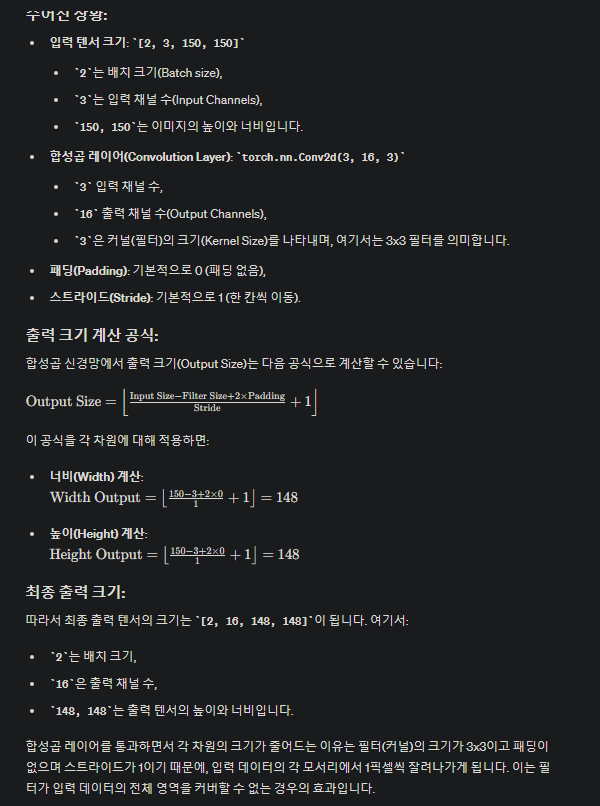

# torch.nn.AvgPool2d

In [164]:
avg_pool2d = torch.nn.AvgPool2d(2)
avg_pool2d(x).shape

torch.Size([2, 16, 74, 74])

# torch.nn.MaxPool2d

In [165]:
max_pool2d = torch.nn.MaxPool2d(2)
max_pool2d(x).shape

torch.Size([2, 16, 74, 74])

# 글로벌 풀링

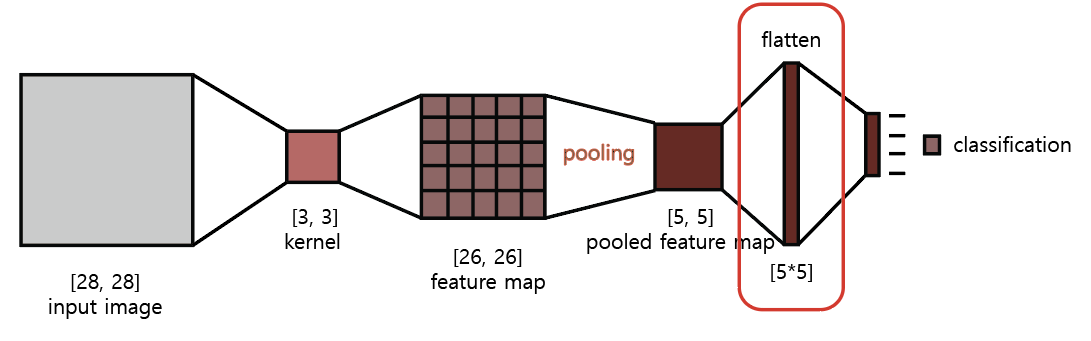

In [166]:
adapt_pool2d = torch.nn.AdaptiveAvgPool2d(1) # 글로벌 풀링
adapt_pool2d(x).shape

torch.Size([2, 16, 1, 1])

In [167]:
adapt_pool2d = torch.nn.AdaptiveMaxPool2d(1) # 글로벌 풀링
adapt_pool2d(x).shape

torch.Size([2, 16, 1, 1])

In [114]:
x = adapt_pool2d(x)
x.shape

torch.Size([2, 16, 1, 1])

In [115]:
x.flatten(1).shape # 2차원 형태로 변경

torch.Size([2, 16])

# 모델 만들기

In [169]:
x.shape

torch.Size([2, 16, 148, 148])

In [171]:
#Conv2dNet 블락
class Conv2dNet(torch.nn.Module):
    def __init__(self, in_channel, out_channel, kernel_size):
        super().__init__()
        self.conv = torch.nn.Conv2d(in_channel, out_channel, kernel_size)
        self.batch_norm = torch.nn.BatchNorm2d(out_channel)
        self.relu = torch.nn.LeakyReLU()
        self.pool = torch.nn.MaxPool2d(2)

    def forward(self, x):
        x = self.conv(x)
        x = self.batch_norm(x)
        x = self.relu(x)
        return self.pool(x)

conv2d_net = Conv2dNet(3, 16, 3)

x = batch["x"]
x=x.permute(0,3,2,1)
conv2d_net(x).shape # b, c , h , w

# 레드와인,오팔트블루 등등 다양한 색상으로 표현력을 더 욱 높인다고 생각하면 편하다.

torch.Size([2, 16, 74, 74])

In [175]:
x = batch["x"]
x=x.permute(0,3,2,1)
x.shape # b, c, h, w

torch.Size([2, 3, 150, 150])

In [176]:
import torch.nn as nn
class Conv2dNet(nn.Module):
    def __init__(self, in_channel, out_channel, kernel_size, activation=nn.LeakyReLU, dropout_rate=0.5):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size, padding=1)
        self.batch_norm1 = nn.BatchNorm2d(out_channel)
        self.activation1 = activation()
        
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size, padding=1)
        self.batch_norm2 = nn.BatchNorm2d(out_channel)
        self.activation2 = activation()
        
        self.pool = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batch_norm1(x)
        x = self.activation1(x)
        
        x = self.conv2(x)
        x = self.batch_norm2(x)
        x = self.activation2(x)
        
        x = self.pool(x)
        x = self.dropout(x)
        return x

conv2d_net = Conv2dNet(3, 16, 3)
x=conv2d_net(x)
x.shape # b, c , h , w

torch.Size([2, 16, 75, 75])

In [178]:
q=x.shape[1]//4
x[:,:q*2,:,:]
x[:,q*2:q*4,:,:]
x[:,q*4:q*8,:,:]
x[:,q*8:,:,:]

tensor([], size=(2, 0, 75, 75), grad_fn=<SliceBackward0>)

In [183]:
x = batch["x"]
x=x.permute(0,3,2,1)
x.shape # b, c, h, w

torch.Size([2, 3, 150, 150])

In [217]:
import torch
import torch.nn as nn

class Conv2dNet(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size):
        super(Conv2dNet, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, padding=1)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return self.relu(x)

class Quantom_Conv2dNet(nn.Module):
    def __init__(self, in_channel=3, out_channel=16, kernel_size=3):
        super(Quantom_Conv2dNet, self).__init__()
        self.conv1 = Conv2dNet(in_channel, out_channel, kernel_size)
        self.conv2 = Conv2dNet(out_channel, out_channel * 2, kernel_size)
        self.conv3 = Conv2dNet(out_channel * 2, out_channel * 4, kernel_size)
        self.conv4 = Conv2dNet(out_channel * 4, out_channel * 8, kernel_size)

        self.maxpool = nn.AdaptiveMaxPool2d(1)
        self.avgpool = nn.AdaptiveAvgPool2d(1)

        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.2)

        self.fc = nn.Linear(out_channel * 8, 1)  # 합쳐진 후의 채널 수에 맞춤

    def forward(self, x):
        # Conv 연산을 차례로 적용
        x=x.permute(0,3,2,1)
        # print(x.shape)
        
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        
        # print(x.shape)
        # x의 채널을 4등분
        q = x.shape[1] // 4

        # x를 네 부분으로 나눔
        x1 = x[:, :q, :, :]         # 첫 번째 1/4
        x2 = x[:, q:q*2, :, :]      # 두 번째 1/4
        x3 = x[:, q*2:q*3, :, :]    # 세 번째 1/4
        x4 = x[:, q*3:, :, :]       # 네 번째 1/4

        # 각 부분에 대해 다른 처리 적용 (MaxPool과 AvgPool)
        x1 = self.maxpool(x1)
        x2 = self.avgpool(x2)
        x3 = self.maxpool(x3)
        x4 = self.avgpool(x4)

        # 네 파트를 다시 하나로 합침
        x = torch.cat((x1, x2, x3, x4), dim=1)

        # Flatten 후 FC 층으로 전달
        x = self.flatten(x)
        x = self.dropout(x)

        return self.fc(x)


model = Quantom_Conv2dNet()
output = model(batch['x'])

In [215]:
output,output.shape

(tensor([[-1.5046],
         [-0.7690]], grad_fn=<AddmmBackward0>),
 torch.Size([2, 1]))

In [192]:
model

Net(
  (conv1): Conv2dNet(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2): Conv2dNet(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv3): Conv2dNet(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv4): Conv2dNet(
    (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool): AdaptiveMaxPool2d(output_size=1)
  (avgpool): AdaptiveAvgPool2d(output_size=1)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (d

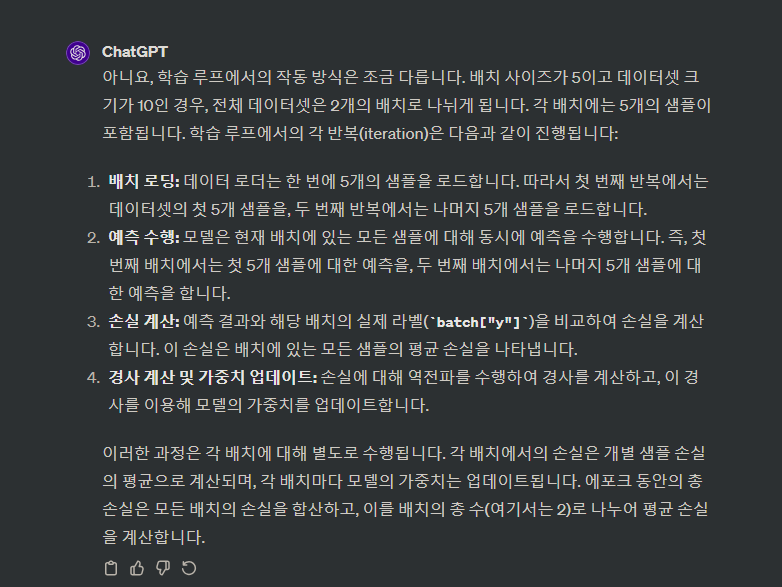

# 학습 loop 함수

In [205]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train() # 학습 모드

    for batch in dataloader:
        pred = model( batch["x"].to(device) )
        loss = loss_fn( pred, batch["y"].float().to(device) )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        
    epoch_loss /= len(dataloader)
    return epoch_loss

# 테스트 loop 함수


In [206]:
@torch.no_grad()
def test_loop(dataloader, model, loss_fn, device):
    epoch_loss = 0
    pred_list = []
    act_func = torch.nn.Sigmoid()
    model.eval() # 평가 모드

    for batch in dataloader:
        pred = model( batch["x"].to(device) )

        if batch.get("y") is not None:
            loss = loss_fn( pred, batch["y"].float().to(device) )
            epoch_loss += loss.item()

        pred = act_func(pred) # logit 값을 확률로 변환
        pred = pred.to("cpu").numpy() # cpu 이동후 ndarray 로변환
        pred_list.append(pred)
        
    epoch_loss /= len(dataloader)
    pred = np.concatenate(pred_list)
    return epoch_loss, pred

# 하이퍼 파라미터 정의

In [207]:
n_splits = 5
batch_size = 32
epochs = 100
loss_fn = torch.nn.BCEWithLogitsLoss()

In [208]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

In [209]:
train.shape

(2000,)

In [210]:
import os

os.makedirs

save_dir=os.getcwd()
os.makedirs(os.path.join(save_dir,'weight/cats_dogs'),exist_ok=True)

In [211]:
save_dir=save_dir+'\\weight\\cats_dogs\\'

In [227]:
#gpu로 돌리는 것을 추천 너무 오래걸림
# model에 output 안주는 걸 추천 그러면 성능 80까진 나옴
# mine

is_holdout = False
reset_seeds(SEED) # 재현을 위해 시드고정
best_score_list = []
for i, (tri, vai) in enumerate( cv.split(train) ):
    # 학습용 데이터
    x_train = train[tri]
    y_train = target[tri]

    # 검증용 데이터
    x_valid = train[vai]
    y_valid = target[vai]

    # 학습용 데이터로더 객체
    train_dt = CatDogDataset(x_train, y_train)
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)

    # 검증용 데이터로더 객체
    valid_dt = CatDogDataset(x_valid, y_valid)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체와 옵티마이저 객체 생성
    model = Quantom_Conv2dNet().to(device)
    optimizer = torch.optim.Adam( model.parameters() )
    best_score = 0 # 현재 최고 점수
    patience = 0 # 조기 종료 조건을 주기 위한 변수

    for epoch in tqdm( range(epochs) ):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)
        
        pred = (pred > 0.5).astype(int) # 확률 -> 클래스 값
        score = accuracy_score(y_valid, pred)
        #
        # print(train_loss, valid_loss, score)
        if score > best_score:
            best_score = score # 최고 점수 업데이트
            patience = 0
            torch.save(model.state_dict(), os.path.join(save_dir,f"Quanrtom_Conv2dNet_model_{i}(cats_dogs).pth")) # 최고 점수 모델 가중치 저장
            
        patience += 1
        if patience == 5:
            break
    print(f"{i}번째 폴드 최고 정확도: {best_score}")
    best_score_list.append(best_score)
    if is_holdout:
        break
    
    

  0%|          | 0/100 [00:00<?, ?it/s]

0번째 폴드 최고 정확도: 0.6825


  0%|          | 0/100 [00:00<?, ?it/s]

1번째 폴드 최고 정확도: 0.805


  0%|          | 0/100 [00:00<?, ?it/s]

2번째 폴드 최고 정확도: 0.8075


  0%|          | 0/100 [00:00<?, ?it/s]

3번째 폴드 최고 정확도: 0.695


  0%|          | 0/100 [00:00<?, ?it/s]

4번째 폴드 최고 정확도: 0.7725


In [70]:

np.mean(best_score_list)

0.6094999999999999

# 테스트 데이터 평가해보기

In [228]:
cats_test_list = sorted(glob("C:/study/03_Deep_Learning/data/cats_and_dogs/test/cats/*.jpg"), key=lambda x: x )
dogs_test_list = sorted(glob("C:/study/03_Deep_Learning/data/cats_and_dogs/test/dogs/*.jpg"), key=lambda x: x )

len(cats_test_list), len(dogs_test_list)

(1000, 1000)

In [229]:
test_img_path = cats_test_list + dogs_test_list
test_labels = [0] * len(cats_test_list) + [1] * len(dogs_test_list)
len(test_img_path) , len(test_labels)

(2000, 2000)

In [234]:
test = np.array(test_img_path)
y_test = np.array(test_labels)

test_dt = CatDogDataset(test)
test_dl = torch.utils.data.DataLoader(test_dt, batch_size=batch_size, shuffle=False)

In [237]:
pred_list = []
for i in range(n_splits):
    model = Quanrtom_Conv2dNet().to(device)
    state_dict = torch.load(os.path.join(save_dir,f"Quanrtom_Conv2dNet_model_{i}(cats_dogs).pth"))
    model.load_state_dict(state_dict)

    _, pred = test_loop(test_dl, model, loss_fn, device)

    pred_list.append(pred)

pred = np.mean(pred_list, axis=0)
pred.shape

(2000, 1)

In [238]:
pred = (pred > 0.5).astype(int)

In [239]:
accuracy_score(y_test, pred) 
# 바닐라 0.6005
# 퀀텀 0.7815

0.7815